# **What are the differences between using *pandas*, *polars* or *csv* python package/module to do a basic ETL process?**
We want to compare three methods of doing the following process in python:
* Read a csv file and extract the data.
* Add 3 new columns doing a basic transformation on each of them (Arithmetic, Text and Conditional)
* Export a new csv file with the results and load it into a folder.

This process runs 250 times for each method and each iteration gives as result the execution time of each task. 


In [195]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

# *Reading result of experiments:*


In [196]:
csv = pd.read_csv('results/results_csv.csv') 
pandas = pd.read_csv('results/results_pandas.csv')
polars = pd.read_csv('results/results_polars.csv')

csv = csv.round(decimals = 3)
pandas = pandas.round(decimals = 3)
polars = polars.round(decimals = 3)

csv['Total_time']= csv.loc[:,'Load']+csv.loc[:,'Transformation']+csv.loc[:,'Writing']
pandas['Total_time']= pandas.loc[:,'Load']+pandas.loc[:,'Transformation']+pandas.loc[:,'Writing']
polars['Total_time']= polars.loc[:,'Load']+polars.loc[:,'Transformation']+polars.loc[:,'Writing']


# **Results summary** 

In [197]:
csv.describe()

,Load,Transformation,Writing,Total_time
count,250.000000,250.000000,250.000000,250.000000
mean,17.983528,6.682200,30.475208,55.140936
std,0.151973,0.018228,0.123199,0.238393
min,17.667000,6.631000,30.263000,54.674000
25%,17.875500,6.672000,30.368000,54.950500
50%,17.981500,6.681000,30.476500,55.130500
75%,18.078000,6.689750,30.569000,55.319000
max,18.469000,6.753000,30.861000,55.841000


## **Data analysis** 
give to variable the array you want to analyze

In [198]:
variable = csv.Total_time

# *Descriptive analysis:*

*Histogram:*

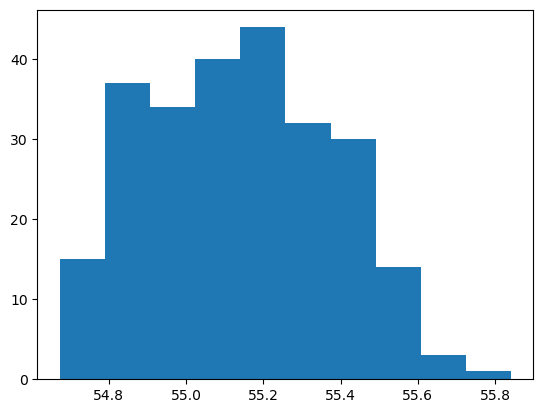

In [199]:
pyplot.hist(variable)
pyplot.show()

*Boxplot:*

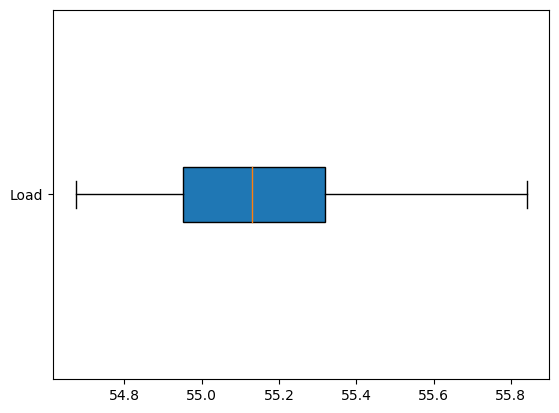

In [200]:
pyplot.boxplot([variable],labels=['Load'],vert=0,patch_artist=True)
pyplot.show()

*QQplot:*

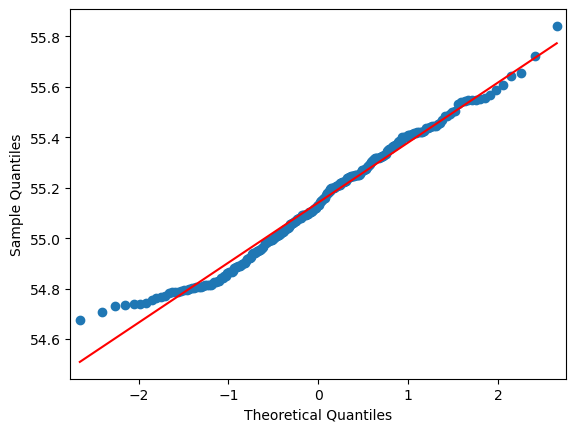

In [201]:
qqplot(variable,line='s')
pyplot.show()

# *Normality tests:*

In [202]:
# (H0) Null: data is not normally distributed
# (H1) Alt: data is normally distributed
# Shapiro-Wilk Test
stat, p = shapiro(variable)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample doest not look Gaussian (reject H0)')

Statistics=0.981, p=0.002
Sample doest not look Gaussian (reject H0)


In [203]:
# D'Agostino and Pearson's test
# normality test
stat, p = normaltest(variable)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample doest not look Gaussian (reject H0)')

Statistics=13.072, p=0.001
Sample doest not look Gaussian (reject H0)


In [204]:
# Anderson-Darling Test
# normality test
result = anderson(variable)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does notlook normal (reject H0)' % (sl, cv))
        

Statistic: 1.169
15.000: 0.567, data does notlook normal (reject H0)
10.000: 0.646, data does notlook normal (reject H0)
5.000: 0.775, data does notlook normal (reject H0)
2.500: 0.904, data does notlook normal (reject H0)
1.000: 1.075, data does notlook normal (reject H0)


# **Methods comparison:**

*Load:*

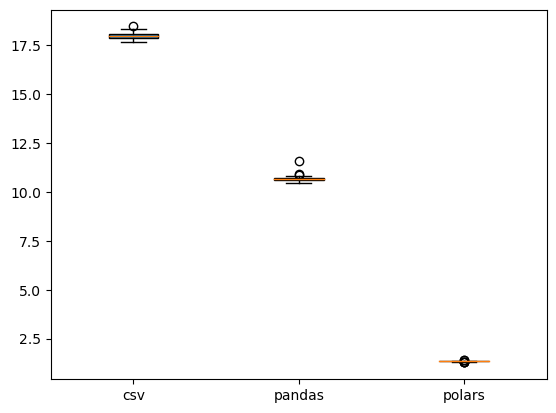

In [205]:
pyplot.boxplot([csv.Load,pandas.Load,polars.Load],labels=['csv','pandas','polars'],vert=1,patch_artist=True)
#pyplot.show()
pyplot.savefig('Load_boxplot.jpg',dpi=100)

*Transformation:*

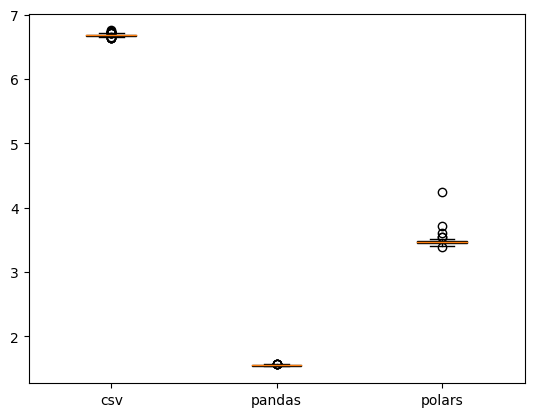

In [206]:
pyplot.boxplot([csv.Transformation,pandas.Transformation,polars.Transformation],labels=['csv','pandas','polars'],vert=1,patch_artist=True)
#pyplot.show()
pyplot.savefig('Transformation_boxplot.jpg',dpi=100)

*Writing:*

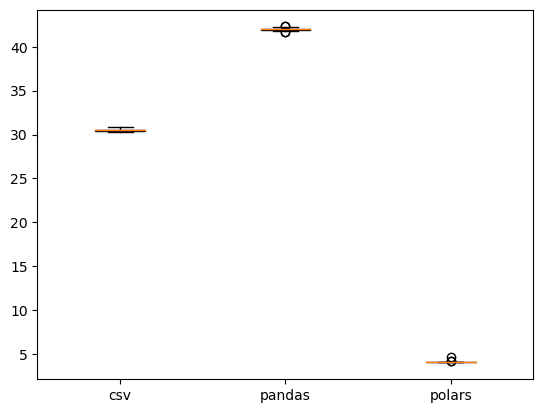

In [207]:
pyplot.boxplot([csv.Writing,pandas.Writing,polars.Writing],labels=['csv','pandas','polars'],vert=1,patch_artist=True)
#pyplot.show()
pyplot.savefig('Writing_boxplot.jpg',dpi=100)

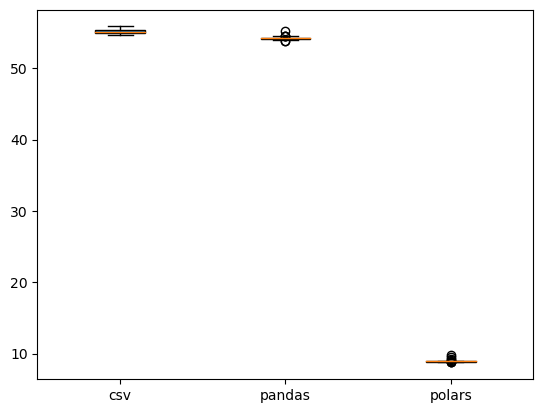

In [210]:
pyplot.boxplot([csv.Total_time,pandas.Total_time,polars.Total_time],labels=['csv','pandas','polars'],vert=1,patch_artist=True)
#pyplot.show()
pyplot.savefig('Total_time_boxplot.jpg',dpi=100)

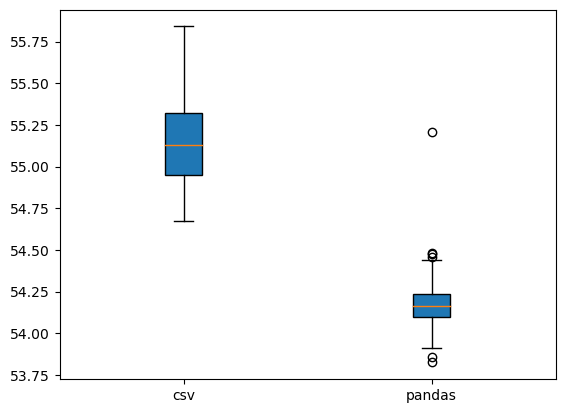

In [211]:
pyplot.boxplot([csv.Total_time,pandas.Total_time],labels=['csv','pandas'],vert=1,patch_artist=True)
#pyplot.show()
pyplot.savefig('csvVSpandas_time_boxplot.jpg',dpi=100)

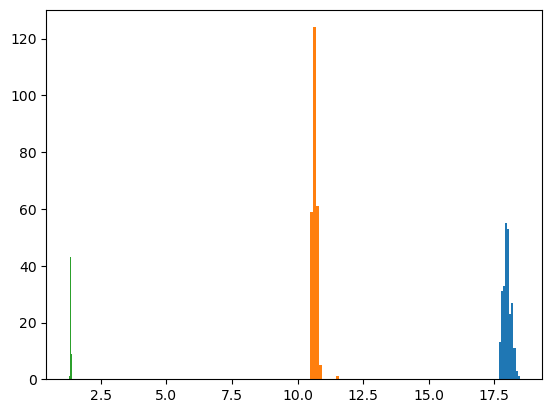

In [209]:
pyplot.hist(csv.Load, label='csv')
pyplot.hist(pandas.Load, label='pandas')
pyplot.hist(polars.Load, label='polars')
pyplot.show()